In [112]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv('data/climate-of-regions/全球部分地区气候.csv')
df_after_drop = df.drop(['地区'], axis=1)
df_after_drop

,平均气温(℃),降水量(mm),平均海平面气压(hPa),平均风速(knots),平均能见度(km),最低气温极值(℃),最高气温极值(℃),最大单日降水量(mm),最大瞬时风速极值(knots),最大能见度(km),最小能见度(km)
0,-4.474000,0.000000,1012.298000,10.976000,NaN,-34.732000,20.244000,0.000000,54.000000,NaN,NaN
1,28.019500,99.061000,1011.319444,2.870526,4.653529,22.173000,33.802500,19.748500,NaN,6.569412,3.634118
2,-45.620417,0.021250,NaN,8.212174,NaN,-69.905833,-14.785833,0.021250,NaN,NaN,NaN
3,12.202833,599.731667,1017.850189,4.988833,13.301833,-14.908333,37.471333,83.253000,47.752381,30.934333,1.191000
4,13.240000,0.000000,1016.290000,9.540000,12.210000,6.280000,24.610000,0.000000,NaN,23.660000,0.640000
5,15.598824,0.000000,1011.195000,7.806471,23.502353,-4.657059,32.824118,0.000000,NaN,58.125294,2.147647
6,28.019500,99.061000,1011.319444,2.870526,4.653529,22.173000,33.802500,19.748500,NaN,6.569412,3.634118
7,-1.330789,0.233947,1007.060000,12.400000,NaN,-20.697368,15.086316,0.100263,56.120000,NaN,NaN
8,22.779118,1148.603529,1012.125758,2.679118,20.593529,5.197941,35.602941,138.205882,50.140000,31.088235,6.683235
9,14.770000,357.001905,1015.756667,6.731905,18.189500,-1.354286,31.328095,33.394286,33.620000,24.907000,4.610500


In [124]:
array_after_preprocess = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df_after_drop)
array_after_preprocess = StandardScaler().fit_transform(array_after_preprocess)
array_after_preprocess

array([[-8.01212824e-01, -6.24667752e-01, -7.16654264e-02,
         1.35526991e+00, -3.30703851e-16, -1.12807610e+00,
        -4.56647990e-01, -6.61155868e-01,  1.23322541e+00,
         5.38399061e-16, -2.09675871e-16],
       [ 9.69095949e-01, -3.49491153e-01, -4.45311936e-01,
        -1.25689479e+00, -1.35156030e+00,  1.14708838e+00,
         5.65411665e-01, -1.74547967e-01,  8.47234215e-16,
        -1.05326285e+00,  1.21865922e-01],
       [-3.04294924e+00, -6.24608723e-01, -4.34095845e-14,
         4.64567004e-01, -3.30703851e-16, -2.53438937e+00,
        -3.09724830e+00, -6.60632262e-01,  8.47234215e-16,
         5.38399061e-16, -2.09675871e-16],
       [ 1.07373335e-01,  1.04129686e+00,  2.04835312e+00,
        -5.74224409e-01,  2.58491999e-01, -3.35490175e-01,
         8.41973713e-01,  1.39021854e+00,  4.88274214e-01,
         7.92938680e-01, -1.03164740e+00],
       [ 1.63880183e-01, -6.24667752e-01,  1.45261887e+00,
         8.92487761e-01,  5.52256959e-02,  5.11657586e-01,
  

In [125]:
df_after_preprocess = pd.DataFrame(array_after_preprocess,
                                   columns=df_after_drop.columns)
df_after_preprocess.to_csv('data/climate-of-regions/全球部分地区气候-预处理后.csv')

In [66]:
array_after_pca = PCA(n_components=2).fit_transform(array_after_preprocess)
array_after_pca

array([[ 2.10114583, -0.49416521],
       [-1.36879921,  2.10450635],
       [ 4.27919843, -0.87713213],
       [-1.3591087 , -1.91105466],
       [ 0.73556172, -0.09358325],
       [ 0.32150294, -2.34846396],
       [-1.36879921,  2.10450635],
       [ 2.2754546 , -0.08437838],
       [-3.55921839, -2.51759584],
       [-0.81868821, -0.6681579 ],
       [-2.65074392,  0.58345228],
       [ 1.04433172,  0.83486061],
       [ 0.44606639,  0.76514791],
       [-0.07790399,  2.60205782]])

In [67]:
array_after_pca[0,0]

2.1011458316626674

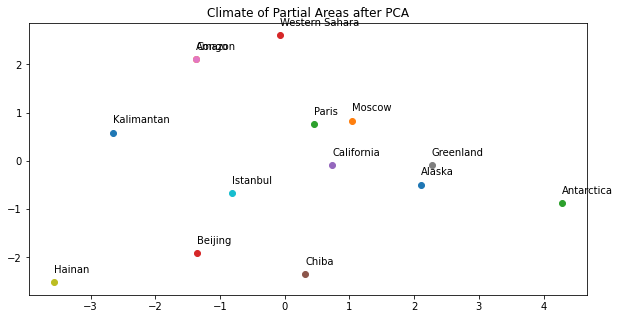

In [110]:
region_list = df['地区'].tolist()
plt.figure(figsize=(10,5))
plt.title('Climate of Partial Areas after PCA')
for index, region in enumerate(region_list):
    plt.scatter(array_after_pca[index,0],
                array_after_pca[index,1])
    plt.annotate(region,
                 xy=(array_after_pca[index,0],
                     array_after_pca[index,1]),
                 xytext=(array_after_pca[index,0],
                         array_after_pca[index,1]+0.2))
plt.savefig('img/全球部分地区气候-PCA 后.png')

In [99]:
label_list = GaussianMixture(n_components=3).fit_predict(array_after_pca)

In [108]:
label_dict = {}
for index, label in enumerate(label_list):
    if label not in label_dict:
        label_dict[label] = [array_after_pca[index, :]]
    else:
        label_dict[label] = np.concatenate((label_dict[label],
                                            [array_after_pca[index, :]]))

array([[ 2.10114583, -0.49416521],
       [ 4.27919843, -0.87713213],
       [ 0.73556172, -0.09358325],
       [ 2.2754546 , -0.08437838],
       [ 1.04433172,  0.83486061],
       [ 0.44606639,  0.76514791]])

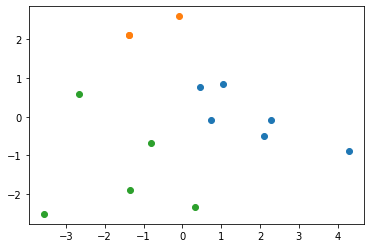

In [109]:
for label in label_dict:
    plt.scatter(label_dict[label][:,0],
                label_dict[label][:,1])

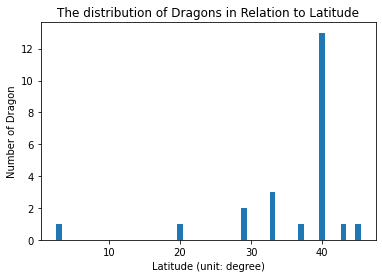

In [161]:
latitude_dict = {
    40: 13,
    33: 3,
    29: 2,
    45: 1,
    43: 1,
    37: 1,
    20: 1,
    3: 1
}

x, y = [], []
for latitude in latitude_dict:
    x.append(latitude)
    y.append(latitude_dict[latitude])

plt.title('The distribution of Dragons in Relation to Latitude')
plt.bar(x, y)
plt.xlabel('Latitude (unit: degree)')
plt.ylabel('Number of Dragon')
plt.savefig('龙的分布与纬度的关系.png')

In [186]:
x_for_gaussian = []
for latitude in latitude_dict:
    for _ in range(latitude_dict[latitude]):
        x_for_gaussian.append(latitude)

x_for_gaussian

[40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 33,
 33,
 33,
 29,
 29,
 45,
 43,
 37,
 20,
 3]

In [190]:
from scipy.stats import norm

mu, sigma_square = norm.fit(x_for_gaussian)
mu,sigma_square

(35.869565217391305, 8.867646851365322)

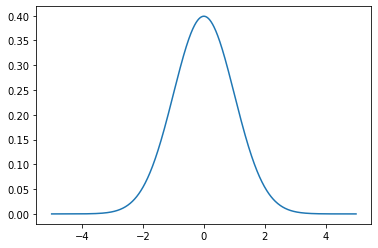

In [263]:
def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2*np.pi)*sigma) \
            * np.exp(-(np.power(x-mu,2)) / (2*sigma**2))

x_test = np.linspace(-5,5,1000)
y_test = gaussian(x_test,0,1)
plt.plot(x_test, y_test)

In [1]:
x_gaussian = np.linspace(0, 90, 10000)
y_gaussian = gaussian(x_gaussian, mu, sigma_square)
plt.title('The Distribution of Dragons in Relation to Latitude')
plt.bar(x, y/np.sum(y))
plt.plot(x_gaussian, y_gaussian, c='red', linestyle='--')
plt.xlabel('Latitude (unit: degree)')
plt.ylabel('Frequency of Dragon')
plt.savefig('龙的分布与纬度的关系-高斯分布.png')


NameError: name 'np' is not defined